In [1]:
# %load_ext autotime
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np

In [3]:
from experiments.run import run
from experiments.post_processing import post_process

In [4]:
results, exceptions = run()

Running experiment
Experiment complete


In [5]:
df = pd.DataFrame(results)
df = post_process(df)
df

,eth_price,eth_supply,eth_staked,supply_inflation,average_effective_balance,number_of_validators,number_of_validators_online,number_of_validators_offline,base_reward,validating_rewards,...,pool_cloud_cloud_costs,staas_full_cloud_costs,staas_self_custodied_cloud_costs,diy_hardware_third_party_costs,diy_cloud_third_party_costs,pool_staas_third_party_costs,pool_hardware_third_party_costs,pool_cloud_third_party_costs,staas_full_third_party_costs,staas_self_custodied_third_party_costs
0,0.000000,1.120000e+08,0.000000e+00,0.000000,3.200000e+10,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
1,1000.000000,1.120000e+08,5.242880e+05,0.000774,3.200000e+10,1.638400e+04,1.605693e+04,327.074087,22360.0,1.077099e+09,...,0.445645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1014.440311,1.120000e+08,5.291187e+05,0.000777,3.199996e+10,1.653496e+04,1.620487e+04,330.087683,22258.0,1.082064e+09,...,0.449751,0.0,0.0,0.0,0.0,34.682861,0.0,0.0,12.845504,10.276403
3,1011.859669,1.120000e+08,5.339494e+05,0.000781,3.199994e+10,1.668594e+04,1.635284e+04,333.101712,22157.0,1.086989e+09,...,0.453858,0.0,0.0,0.0,0.0,34.754105,0.0,0.0,12.871891,10.297513
4,1014.149349,1.120000e+08,5.387801e+05,0.000784,3.199993e+10,1.683691e+04,1.650079e+04,336.115548,22057.0,1.091874e+09,...,0.457964,0.0,0.0,0.0,0.0,34.991293,0.0,0.0,12.959738,10.36779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,1045.017858,1.120391e+08,3.358068e+07,0.006192,3.198623e+10,1.049848e+06,1.028890e+06,20958.133590,2792.0,8.617981e+09,...,28.555864,0.0,0.0,0.0,0.0,285.809866,0.0,0.0,105.855506,84.684405
6845,1031.983459,1.120391e+08,3.358551e+07,0.006193,3.198623e+10,1.049999e+06,1.029038e+06,20961.148642,2792.0,8.619221e+09,...,28.559972,0.0,0.0,0.0,0.0,282.285602,0.0,0.0,104.550223,83.640178
6846,1022.291574,1.120391e+08,3.359034e+07,0.006194,3.198623e+10,1.050150e+06,1.029186e+06,20964.164123,2792.0,8.620461e+09,...,28.564081,0.0,0.0,0.0,0.0,279.674741,0.0,0.0,103.583238,82.86659
6847,1016.560357,1.120391e+08,3.359517e+07,0.006194,3.198623e+10,1.050301e+06,1.029334e+06,20967.179408,2792.0,8.621701e+09,...,28.568189,0.0,0.0,0.0,0.0,278.146824,0.0,0.0,103.017342,82.413874


In [6]:
df = df.drop(df.query('timestep == 0').index)

<AxesSubplot:xlabel='timestep'>

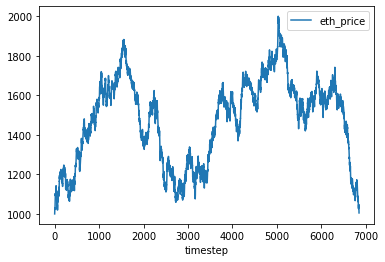

In [7]:
df.plot(x='timestep', y='eth_price')

<AxesSubplot:xlabel='timestep'>

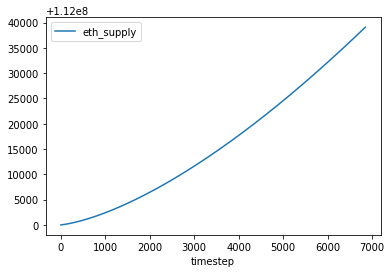

In [8]:
df.plot(x='timestep', y='eth_supply')

<AxesSubplot:xlabel='timestep'>

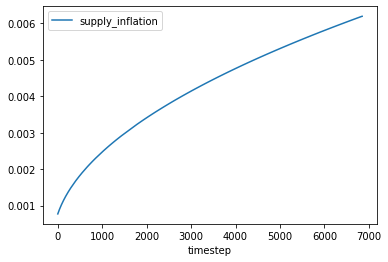

In [9]:
df.plot(x='timestep', y='supply_inflation')

<AxesSubplot:xlabel='timestep'>

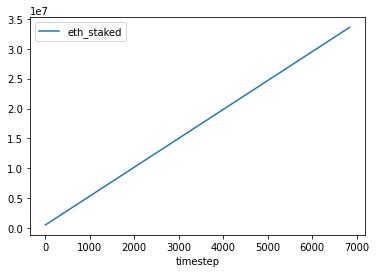

In [10]:
df.plot(x='timestep', y='eth_staked')

<AxesSubplot:xlabel='timestep'>

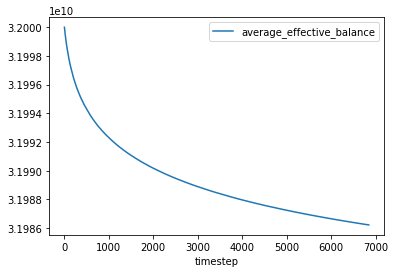

In [21]:
df.plot(x='timestep', y=['average_effective_balance'])

<AxesSubplot:xlabel='timestep'>

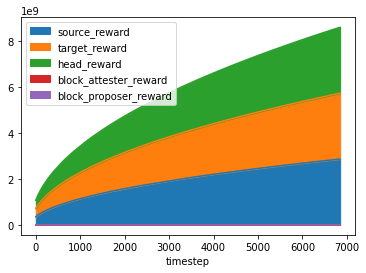

In [12]:
df.plot.area(x='timestep', y=['source_reward', 'target_reward', 'head_reward', 'block_attester_reward', 'block_proposer_reward'])

<AxesSubplot:xlabel='timestep'>

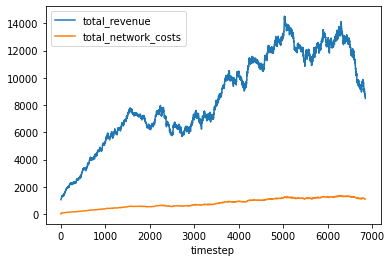

In [13]:
df.plot(x='timestep', y=['total_revenue', 'total_network_costs'])

<AxesSubplot:xlabel='timestep'>

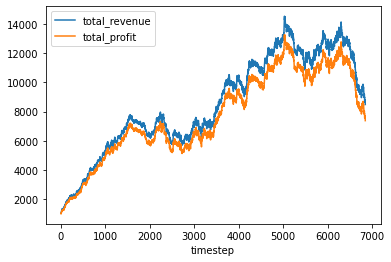

In [14]:
df.plot(x='timestep', y=['total_revenue', 'total_profit'])

<AxesSubplot:xlabel='timestep'>

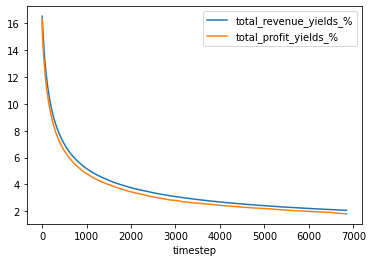

In [15]:
df['total_revenue_yields_%'] = df['total_revenue_yields'] * 100
df['total_profit_yields_%'] = df['total_profit_yields'] * 100
df.plot(x='timestep', y=['total_revenue_yields_%', 'total_profit_yields_%'])

In [16]:
from model.types import validator_types

hardware_costs = [type + '_hardware_costs' for type in validator_types]
cloud_costs = [type + '_cloud_costs' for type in validator_types]
third_party_costs = [type + '_third_party_costs' for type in validator_types]

<AxesSubplot:xlabel='timestep'>

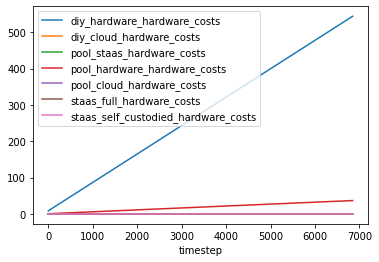

In [17]:
df.plot(x='timestep', y=[*hardware_costs])

<AxesSubplot:xlabel='timestep'>

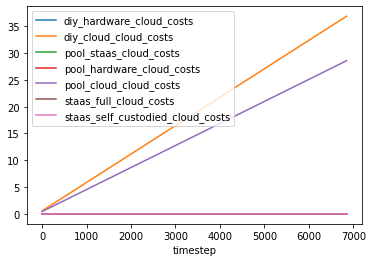

In [18]:
df.plot(x='timestep', y=[*cloud_costs])

<AxesSubplot:xlabel='timestep'>

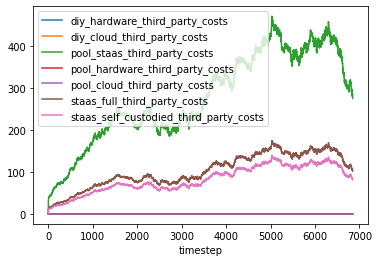

In [19]:
df.plot(x='timestep', y=[*third_party_costs])